In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
fraud_data=pd.read_csv(r'C:\Users\vikra\OneDrive\Desktop\Data scince assignment\Assignment\Decision Trees\Fraud_check.csv')

In [4]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
fraud_data.shape

(600, 6)

In [9]:
len(fraud_data[fraud_data['Taxable.Income']>=30000])

476

In [10]:
len(fraud_data[fraud_data['Taxable.Income']<=30000])

124

In [11]:
fraud_data.loc[fraud_data['Taxable.Income']>=30000,'Tax_inc']="Good"
fraud_data.loc[fraud_data['Taxable.Income']<=30000,'Tax_inc']="risky"

In [12]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_inc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [13]:
fraud_data['Tax_inc'].value_counts()

Good     476
risky    124
Name: Tax_inc, dtype: int64

In [14]:
fraud_data.drop(["Taxable.Income"],axis=1,inplace=True)

In [15]:
fraud_data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_inc
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [16]:
label_encoder= preprocessing.LabelEncoder()
fraud_data['Tax_inc']=label_encoder.fit_transform(fraud_data['Tax_inc'])
fraud_data['Undergrad']=label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital.Status']=label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban']=label_encoder.fit_transform(fraud_data['Urban'])
fraud_data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_inc
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [17]:
fraud_data['Tax_inc'].value_counts()

0    476
1    124
Name: Tax_inc, dtype: int64

In [18]:
#Undergrad= Yes=1, No=0
#Maritalstatus= Divorced=0, married=1 ,single=2
#Tax_inc  Risky=1, Good=0
#Urban= Yes=1, No=0

In [19]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [20]:
df_norm = norm_func(fraud_data)
df_norm

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_inc
0,0.0,1.0,0.139472,0.333333,1.0,0.0
1,1.0,0.0,0.622394,0.600000,1.0,0.0
2,0.0,0.5,0.772568,1.000000,1.0,0.0
3,1.0,1.0,0.962563,0.500000,1.0,0.0
4,0.0,0.5,0.010081,0.933333,0.0,0.0
...,...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0,0.0
596,1.0,0.0,0.170058,0.066667,1.0,0.0
597,0.0,0.0,0.737240,0.000000,1.0,0.0
598,1.0,0.5,0.886810,0.566667,0.0,0.0


In [35]:
y=df_norm['Tax_inc']
x=df_norm.iloc[:,0:5]

In [36]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Name: Tax_inc, Length: 600, dtype: float64

In [37]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0


In [54]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [55]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(480, 5) (120, 5) (480,) (120,)


## Building Decision Tree Classifier using Entropy Criteria 

In [40]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

In [41]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'X[2] <= 0.22\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]'),
 Text(0.3, 0.625, 'X[3] <= 0.783\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]'),
 Text(0.2, 0.375, 'X[2] <= 0.082\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]'),
 Text(0.1, 0.125, 'entropy = 0.811\nsamples = 36\nvalue = [27, 9]'),
 Text(0.3, 0.125, 'entropy = 0.433\nsamples = 45\nvalue = [41, 4]'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.7, 0.625, 'X[2] <= 0.223\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.375, 'X[2] <= 0.601\nentropy = 0.756\nsamples = 372\nvalue = [291, 81]'),
 Text(0.7, 0.125, 'entropy = 0.813\nsamples = 203\nvalue = [152, 51]'),
 Text(0.9, 0.125, 'entropy = 0.675\nsamples = 169\nvalue = [139, 30]')]

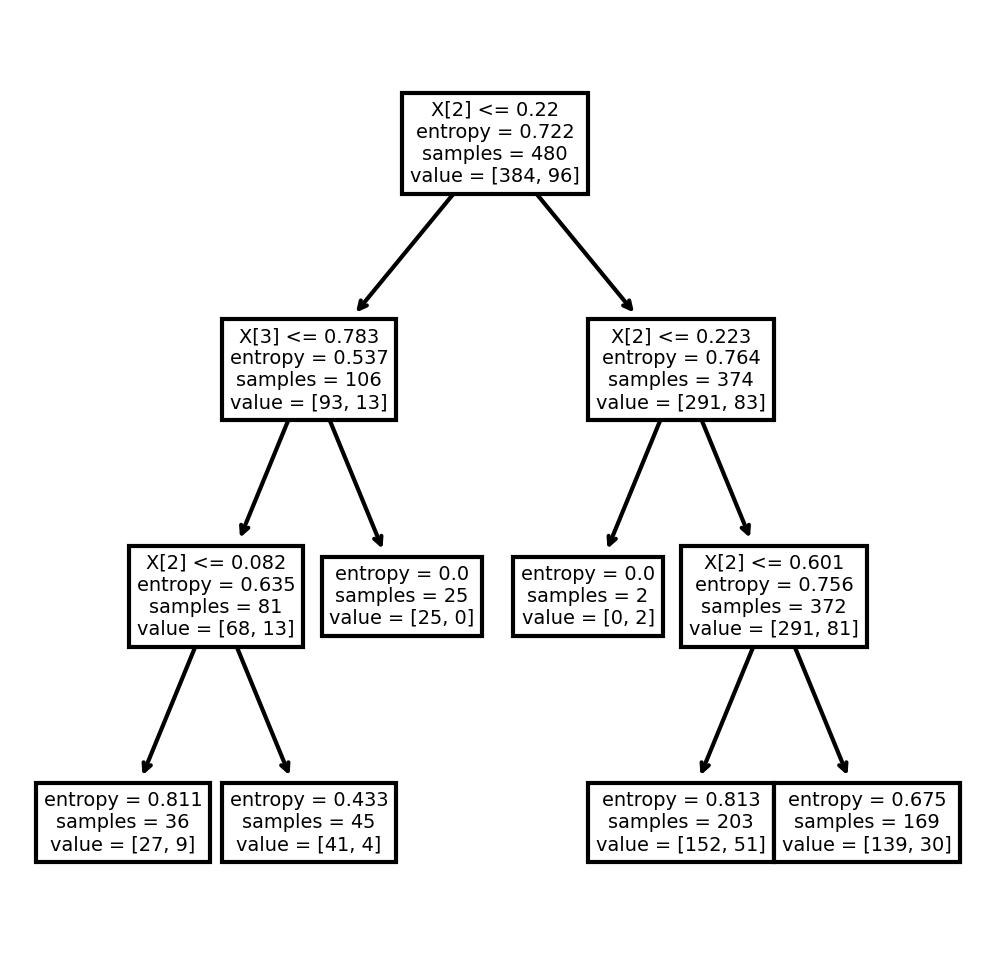

In [42]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model)

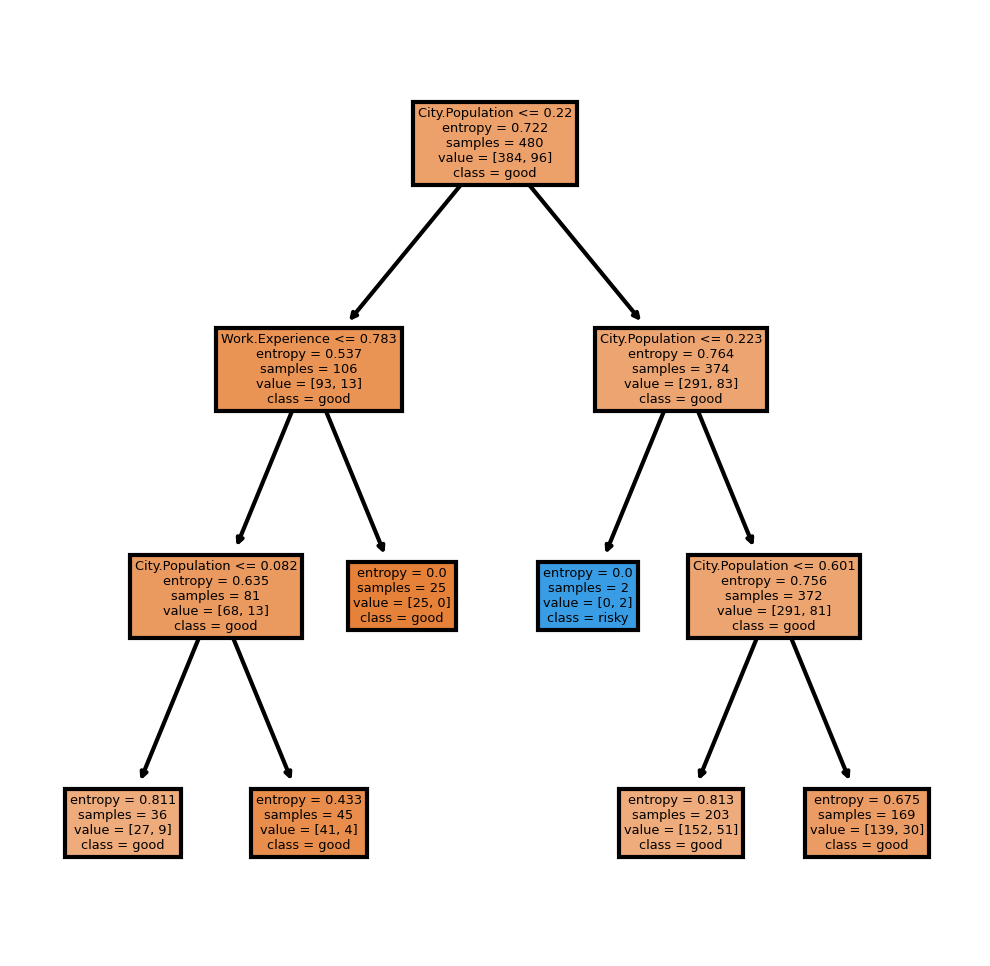

In [43]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [44]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0.0    120
dtype: int64

In [45]:
preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [47]:
np.mean(preds==y_test)

0.7666666666666667

## Building Decision Tree Classifier (CART) using Gini Criteria

In [48]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [49]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [50]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667

## Running the Decision Tree Classifier on Whole Data

In [51]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model1.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [52]:
preds1=model1.predict(x)
np.mean(preds1==y)

0.7966666666666666

In [53]:
pd.crosstab(y,preds1)

col_0,0.0,1.0
Tax_inc,,
0.0,476,0
1.0,122,2


## Decision tree regression example

In [56]:
array = x
array = y

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [58]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

DecisionTreeRegressor()

In [59]:
model2.score(x_test,y_test)

-1.4204392649036306

In [60]:
model2.score(x_train, y_train)

1.0